In [732]:
%autoreload 2

In [894]:
import ajc
import numpy as np
import matplotlib.pyplot as plt

In [895]:
def simpleq(n):
    Q = np.zeros((n,n))
    np.fill_diagonal(Q[1:,:], 1)
    np.fill_diagonal(Q[:,1:], 1)
    np.fill_diagonal(Q, -2)
    return Q

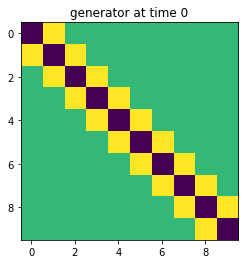

In [1352]:
nx = 10
nt = 10
dt = 0.3

dts = np.array([dt for i in range(nt)])
#dts[-1] = 100
Qs = np.dstack([simpleq(nx) for i in range(nt)])

plt.title("generator at time 0")
plt.imshow(Qs[:,:,0])

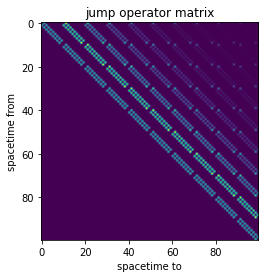

In [1353]:
j1 = ajc.AJCGalerkin(Qs, dts)
plt.title("jump operator matrix")
plt.xlabel("spacetime to")
plt.ylabel("spacetime from")
plt.imshow(j1.km)

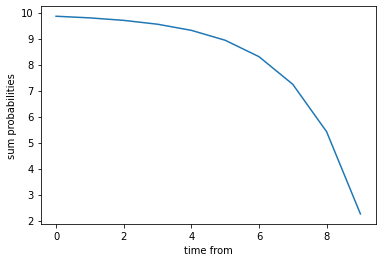

In [1325]:
plt.xlabel("time from")
plt.ylabel("sum probabilities")
plt.plot(j1.k.sum(axis=(0,2,3)))

In [1326]:
p=np.zeros((nx, nt))
p[0,0]=.5
p[-2,0]=.5

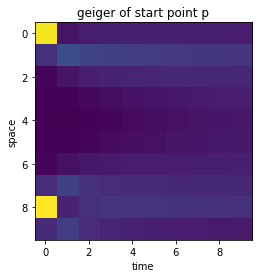

In [1327]:
g = j1.geiger(p)
plt.xlabel("time")
plt.ylabel("space")
plt.title("geiger of start point p")
plt.imshow(g)

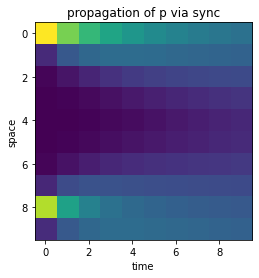

In [1328]:
s = j1.synchronize(g)
plt.xlabel("time")
plt.ylabel("space")
plt.title("propagation of p via sync")
plt.imshow(s)

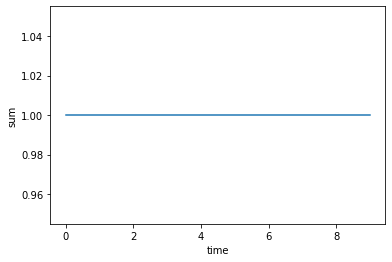

In [1329]:
plt.ylabel("sum"); plt.xlabel("time")
plt.plot(s.sum(axis=0))

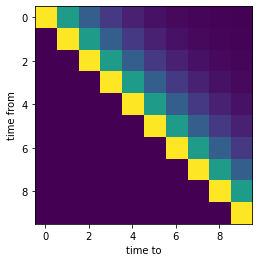

In [1330]:
S = j1.holding_probs()
plt.ylabel("time from")
plt.xlabel("time to")
plt.imshow(S[1,:,:])

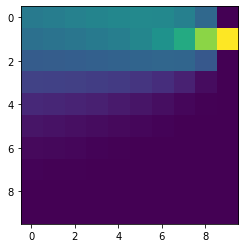

In [1331]:
nxt = j1.k.shape[0] * j1.k.shape[1]
inds_bnd = np.zeros(nxt, dtype=bool)
inds_bnd[-nx:] = True

g = np.zeros(nx)
g[1] = 1

c = j1.unflatten(j1.commitor(g, inds_bnd))
plt.imshow(c)

In [1332]:
c.sum(axis=0)

array([1.48507957, 1.48509891, 1.48510793, 1.485094  , 1.48503037,
       1.48485826, 1.48444321, 1.48346481, 1.48112844, 1.        ])

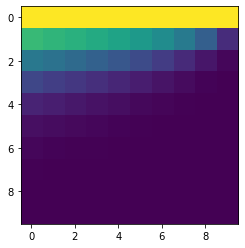

In [1333]:
plt.imshow(j1.unflatten(j1.finite_time_hitting_prob(0)))

In [1322]:
# hitting probabilities for all states when starting from state 0 
[j1.finite_time_hitting_prob(i)[0] for i in range(nx)]

[1.0,
 0.9971092890639832,
 0.8741790412464887,
 0.6167386840787645,
 0.38827803754331935,
 0.22760662889840677,
 0.12523378395693013,
 0.06481259978540282,
 0.031608298254771086,
 0.01455722215385748]

In [1335]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [1337]:
nx=3
A=np.random.rand(nx,nx)
np.pad(A, ((0,1), (0,2)))

array([[0.53679445, 0.36204481, 0.39409814, 0.        , 0.        ],
       [0.00954548, 0.66676612, 0.13734033, 0.        , 0.        ],
       [0.07821047, 0.88914565, 0.12912288, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [1340]:
A[3:,3:]

array([], shape=(0, 0), dtype=float64)

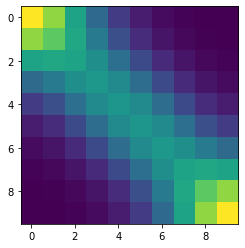

In [1365]:
K1=j1.koopman_commitor()[:nx, :nx]
plt.imshow(K1)

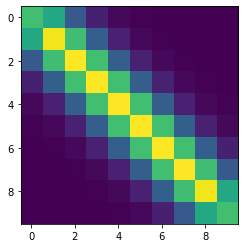

In [1366]:
from scipy.linalg import expm
K2=expm(Qs[:,:,0])
plt.imshow(K2)

In [1367]:
K1

array([[0.32655793, 0.27223085, 0.18996998, 0.11251573, 0.05743813,
        0.02568439, 0.01022075, 0.00367741, 0.00123249, 0.00047235],
       [0.27202681, 0.24474   , 0.194668  , 0.13476957, 0.08070271,
        0.04197173, 0.0191598 , 0.00779361, 0.00292274, 0.00124503],
       [0.19000484, 0.194668  , 0.18953959, 0.16285497, 0.11930317,
        0.07417812, 0.0395446 , 0.01840512, 0.00779361, 0.00370796],
       [0.1126809 , 0.13476957, 0.16285497, 0.1740732 , 0.15633038,
        0.11687604, 0.07342344, 0.0395446 , 0.0191598 , 0.01028709],
       [0.0576108 , 0.08070271, 0.11930317, 0.15633038, 0.17164606,
        0.15557571, 0.11687604, 0.07417812, 0.04197173, 0.02580527],
       [0.02580527, 0.04197173, 0.07417812, 0.11687604, 0.15557571,
        0.17164606, 0.15633038, 0.11930317, 0.08070271, 0.0576108 ],
       [0.01028709, 0.0191598 , 0.0395446 , 0.07342344, 0.11687604,
        0.15633038, 0.1740732 , 0.16285497, 0.13476957, 0.1126809 ],
       [0.00370796, 0.00779361, 0.0184051

In [1371]:

(K1-K2 ) / K2

array([[ 5.16974053e-01,  4.59854508e-01,  1.19939687e+00,
         3.09722310e+00,  7.63886435e+00,  1.87669619e+01,
         4.70272928e+01,  1.21622990e+02,  3.31425068e+02,
         1.16633407e+03],
       [ 4.58760348e-01, -1.88643422e-01, -9.00793278e-02,
         4.48785081e-01,  1.80599462e+00,  5.11688664e+00,
         1.34129189e+01,  3.49950825e+01,  9.51608821e+01,
         3.34808688e+02],
       [ 1.19980057e+00, -9.00793278e-02, -3.85194102e-01,
        -2.43375696e-01,  2.79592538e-01,  1.57645124e+00,
         4.76004788e+00,  1.28410015e+01,  3.49950825e+01,
         1.22641689e+02],
       [ 3.10323763e+00,  4.48785081e-01, -2.43375696e-01,
        -4.35751650e-01, -2.73790125e-01,  2.53510326e-01,
         1.55020297e+00,  4.76004788e+00,  1.34129189e+01,
         4.73390507e+01],
       [ 7.66483436e+00,  1.80599462e+00,  2.79592538e-01,
        -2.73790125e-01, -4.43625756e-01, -2.77297226e-01,
         2.53510326e-01,  1.57645124e+00,  5.11688664e+00,
         1.